In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt



In [ ]:
weight = 0.9
bias = 0.2
t1 = torch.arange(0,2,0.002)

x = t1.unsqueeze(dim=1)

y = weight*x + bias
# x[:10], y[:10]

In [ ]:
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [ ]:
# visualize the data
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels = y_test, predictions=None):
  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

  if predictions is not None:
    # plot predictions in red
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # show legend
  plt.legend(prop={"size":14});



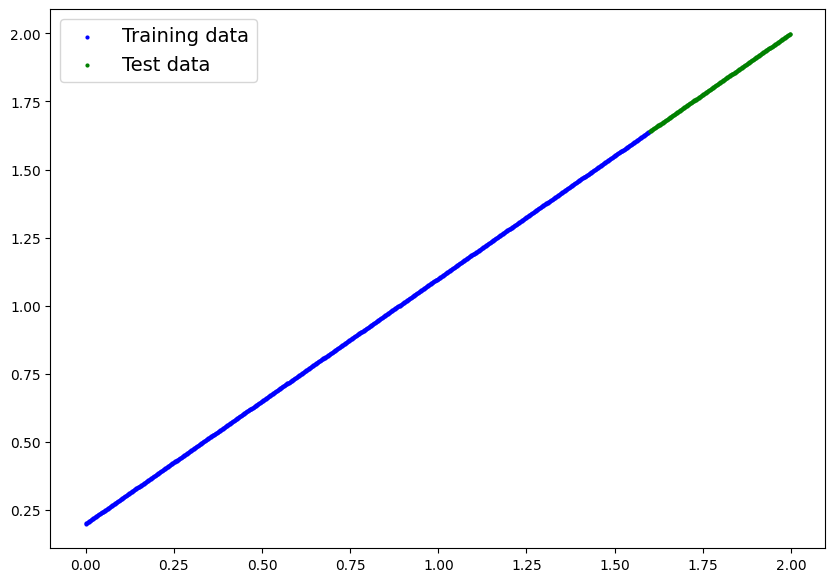

In [ ]:
plot_predictions();

In [ ]:
# Create a linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
  def forward(self, x):
    return self.weights*x + self.bias

In [ ]:
# set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(52)

# Create an instance of this model
model_1 = LinearRegressionModel()

# check the nn.Parameters that we randomly created
list(model_1.parameters())

[Parameter containing:
 tensor([-0.1455], requires_grad=True),
 Parameter containing:
 tensor([-1.1507], requires_grad=True)]

In [ ]:
# list the parameters
model_1.state_dict()

OrderedDict([('weights', tensor([-0.1455])), ('bias', tensor([-1.1507]))])

In [ ]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_1(x_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(y_test)}")
print(f"Number of predictions made: {len(y_preds)}")
#print(f"Predicted values: \n{y_preds} ")

Number of testing samples: 200
Number of predictions made: 200


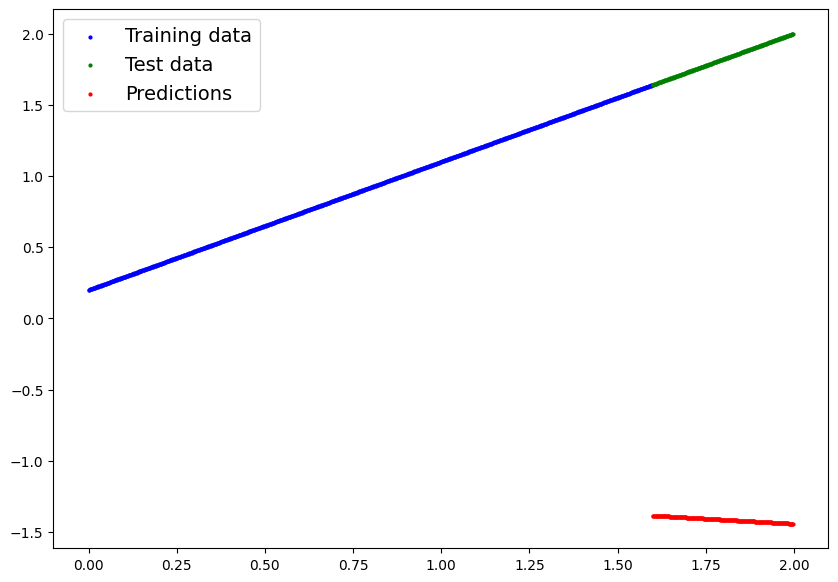

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
list(model_1.parameters())

[Parameter containing:
 tensor([-0.1455], requires_grad=True),
 Parameter containing:
 tensor([-1.1507], requires_grad=True)]

In [ ]:
loss_fn = nn.L1Loss() # MAE is the same as L1Loss

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [ ]:
torch.manual_seed(52)

# Set the number of epochs(number of times the model will pass over the training data)
epochs = 200

# create empty loss lists to track loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training

  # put model in training mode
  model_1.train()

  #1 forward pass the training data using the forward mehtod inside
  y_pred = model_1(x_train)

  #2 Calculate loss
  loss = loss_fn(y_pred, y_train)

  #3. Zero grad of the optimizer
  optimizer.zero_grad()

  #4. loss backwards
  loss.backward()

  #5. progress the optimizer
  optimizer.step()

  ###Testing

  # put the model in evaluation mode
  model_1.eval()

  with torch.inference_mode():
    #1 forward pass on the test data
    test_pred = model_1(x_test)

    #2 calculate the loss on the test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # print out what's happening
    if epoch % 20 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")



Epoch: 0 | MAE Train Loss: 2.1860640048980713 | MAE Test Loss: 3.2072336673736572
Epoch: 20 | MAE Train Loss: 1.8583842515945435 | MAE Test Loss: 2.7197535037994385
Epoch: 40 | MAE Train Loss: 1.530704140663147 | MAE Test Loss: 2.2322733402252197
Epoch: 60 | MAE Train Loss: 1.20302414894104 | MAE Test Loss: 1.74479341506958
Epoch: 80 | MAE Train Loss: 0.8753440976142883 | MAE Test Loss: 1.2573132514953613
Epoch: 100 | MAE Train Loss: 0.5476639270782471 | MAE Test Loss: 0.7698330879211426
Epoch: 120 | MAE Train Loss: 0.21998372673988342 | MAE Test Loss: 0.2823528051376343
Epoch: 140 | MAE Train Loss: 0.002511641476303339 | MAE Test Loss: 0.007540320046246052
Epoch: 160 | MAE Train Loss: 0.0094909043982625 | MAE Test Loss: 0.007540320046246052
Epoch: 180 | MAE Train Loss: 0.0094909043982625 | MAE Test Loss: 0.007540320046246052


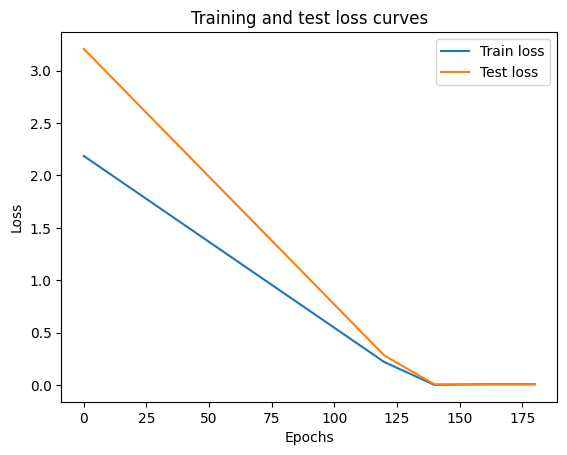

In [ ]:
# plot loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.9073])), ('bias', tensor([0.2036]))])

And the original values for weights and bias are:
weights: 0.9, bias: 0.2


In [ ]:
# 1. Set the model in evaluation mode
model_1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_1(x_test)


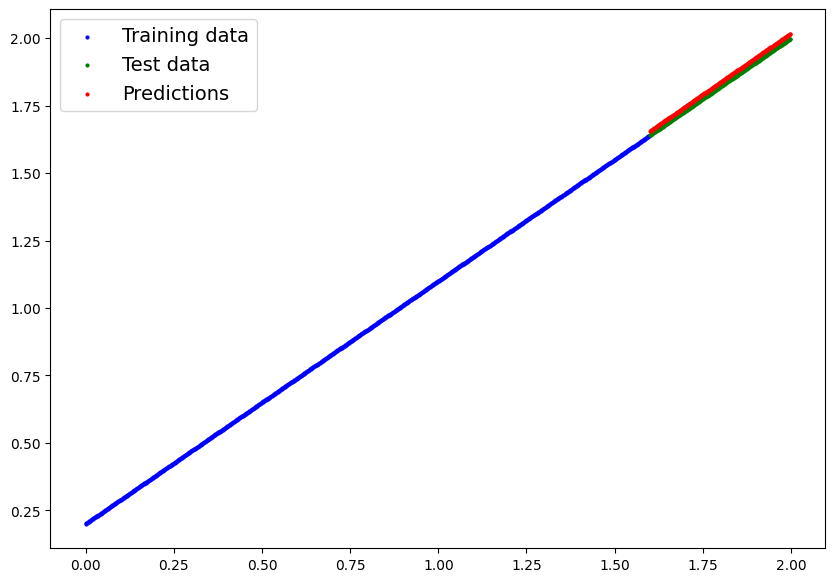

In [ ]:
plot_predictions(predictions=y_preds)